In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

data = pd.read_csv("/content/Titanic-Dataset.csv")

print(data.info())
print(data.isnull().sum())
print(data.describe())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data.head(10)

/tmp/ipython-input-3416565361.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-3416565361.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C


In [25]:
data.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

In [26]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


In [27]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [28]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,Unknown,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,Unknown,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,Unknown,S


In [29]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [31]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,Unknown,False,True
1,1,1,0,38.0,1,0,71.2833,C85,False,False
2,1,3,0,26.0,0,0,7.9250,Unknown,False,True
3,1,1,0,35.0,1,0,53.1000,C123,False,True
4,0,3,1,35.0,0,0,8.0500,Unknown,False,True


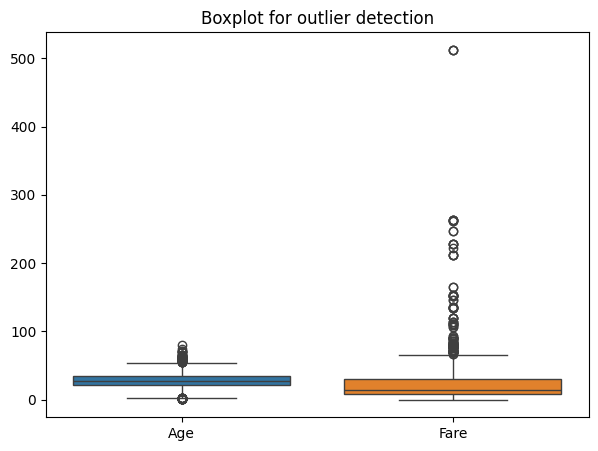

In [36]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=data[['Age', 'Fare']])
plt.title("Boxplot for outlier detection")
plt.show()

In [37]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Fare'] >= Q1 - 1.5 * IQR) & (data['Fare'] <= Q3 + 1.5 * IQR)]

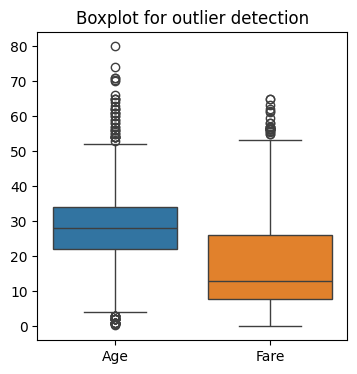

In [40]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=data[['Age', 'Fare']])
plt.title("Boxplot for outlier detection")
plt.show()

In [43]:
sc = StandardScaler()
data[['Age', 'Fare']] = sc.fit_transform(data[['Age', 'Fare']])

print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    775 non-null    int64  
 1   Pclass      775 non-null    int64  
 2   Sex         775 non-null    int64  
 3   Age         775 non-null    float64
 4   SibSp       775 non-null    int64  
 5   Parch       775 non-null    int64  
 6   Fare        775 non-null    float64
 7   Cabin       775 non-null    object 
 8   Embarked_Q  775 non-null    bool   
 9   Embarked_S  775 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(1)
memory usage: 56.0+ KB
None


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,1,-0.528321,1,0,-0.779117,Unknown,False,True
2,1,3,0,-0.215182,0,0,-0.729373,Unknown,False,True
3,1,1,0,0.489381,1,0,2.599828,C123,False,True
4,0,3,1,0.489381,0,0,-0.720161,Unknown,False,True
5,0,3,1,-0.058613,0,0,-0.690071,Unknown,True,False
